# MACHINE LEARNING BUSINESS CASE STUDY

##### Disclaimer: This case study is included for demonstration purposes in my personal portfolio, and the problem itself is NOT my own creation. However, the solution presented here is solely my own work. While there are various methods to approach this problem, both with and without Machine Learning, using my solution for plagiarism is not advised. Anyone doing so will bear full responsibility for their actions.

### Short Description of the Problem:

As Lyft's pricing manager for a new city route, your challenge is to refine the pricing model to ensure profitability and high driver availability. With riders accustomed to paying \\$25 and drivers expecting \\$19 per trip, the current 60% match rate is suboptimal. Previous tests showed reducing Lyft's share from \\$6 to \\$3 per trip increased matches to 95%, without a clear revenue gain. You must devise a strategy that maintains rider fees, adjusts driver pay, and considers acquisition costs and churn rates, all to enhance Lyft's annual net revenue for this route. This requires a strategic, analytical approach to determine the most effective commission structure.

### Detailed Case:

## Lyft Pricing Strategy Problem

## Introduction
Imagine you're the pricing product manager for Lyft's ride-scheduling feature, and you're launching in a new city. In this city, people are accustomed to paying \\$25 for rides from the airport to downtown, in either direction, one way. Drivers typically expect to earn \\$19 for this trip.

For your launch in this new city, you decide to set the price exactly at the prevailing rate: \\$25 per ride charged to the rider, with \\$19 per ride paid to the driver. However, you quickly realize that only about 60% of the ride requests find a driver willing to accept rides at this price point.

For the purpose of this exercise, we will focus on this specific route, even though there may be multiple routes available in the new city.

## Current Unit Economics

### Drivers
- The customer acquisition cost (CAC) of a new driver falls in the range of \\$400 to \\$600. CAC is sensitive to the rate of acquisition due to limited marketing channels.
- At the prevailing wage, drivers experience a 5% monthly churn rate and complete an average of 100 rides per month.

### Riders
- The CAC for acquiring a new rider is between \\$10 to \\$20, which, similar to driver CAC, is sensitive to the rate of acquisition due to limited marketing channels.
- On average, each rider requests only 1 ride per month.
- Churn varies based on rider experiences: Riders who don't encounter a "failed to find driver" event churn at a rate of 10% per month, while riders who experience one or more such events churn at a higher rate of 33% per month.

## Previous Pricing Experiment
You've already conducted one pricing experiment where you reduced Lyft's take from \\$6 per ride to \\$3 per ride across the board for a few weeks. This led to a significant increase in match rates, soaring from 60% to approximately 93%.

## Objective
Your primary objective is to maximize the company's net revenue, which is the difference between the amount riders pay and the amount Lyft pays out to drivers, for this specific route in Toledo for the next 12 months. Keep in mind that you cannot charge riders more than the prevailing rate. 

## Key Question
The central question to address is: How should you adjust the amount you pay drivers per trip (by modifying Lyft's take) to maximize net revenue over the next 12 months on this route?

_

# The Solution


To maximize Lyft's net revenue for the route in Toledo over the next 12 months, we'll use a Machine Learning (ML) model. The ML model will help us predict the optimal balance between Lyft's take and driver payment to maximize net revenue while considering various factors like match rate, driver churn, and rider churn.

### ML Model Approach:

1. **Data Collection:** 
   - Collect historical data on match rates, driver and rider churn rates, and net revenue at different take rates.

2. **Feature Engineering:** 
   - Features can include Lyft's take, match rate, driver churn rate, rider churn rate, and any other relevant factors (e.g., time of day, special events).

3. **Model Selection:** 
   - A regression model (like a Random Forest Regressor) can be used to predict the net revenue based on the features.

4. **Model Training and Validation:** 
   - Train the model on historical data and validate it to ensure accuracy.

5. **Optimization:** 
   - Use the model to predict the net revenue for different take rates and find the optimal rate.

In [1]:
# To ensure we have the required Python libraries installed, we will use the following pip commands to install them:
!pip install --upgrade pexpect
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scikit-learn
!pip install seaborn


  Obtaining dependency information for pexpect from https://files.pythonhosted.org/packages/9e/c3/059298687310d527a58bb01f3b1965787ee3b40dce76752eda8b44e9a2c5/pexpect-4.9.0-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/63.8 kB ? eta -:--:--
   ------ --------------------------------- 10.2/63.8 kB ? eta -:--:--
   ------------------------- -------------- 41.0/63.8 kB 653.6 kB/s eta 0:00:01
   ---------------------------------------- 63.8/63.8 kB 686.3 kB/s eta 0:00:00
  Attempting uninstall: pexpect
    Found existing installation: pexpect 4.8.0
    Uninstalling pexpect-4.8.0:
      Successfully uninstalled pexpect-4.8.0


In [1]:
# Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


## 1. Set Up and Data Simulation
   
We'll start by setting up the environment and simulating a dataset, as we don't have access to real-world data for this scenario. The simulated data will include different values for Lyft's take, match rates, driver churn rates, and rider churn rates, along with the resulting net revenue.

In [2]:
# Correcting the code for visibility and proper prints

np.random.seed(0)
data_size = 1000
lyft_takes = np.random.uniform(3, 6, data_size)  # Randomly generated Lyft's takes between $3 and $6
match_rates = np.random.uniform(0.6, 0.93, data_size)  # Random match rates between 60% and 93%
driver_churn_rates = np.random.uniform(0.03, 0.07, data_size)  # Random driver churn rates between 3% and 7%
rider_churn_rates = np.random.uniform(0.1, 0.33, data_size)  # Random rider churn rates between 10% and 33%

# Example prints for visibility
print("Example Lyft takes:", lyft_takes[:5])
print("Example Match rates:", match_rates[:5])
print("Example Driver churn rates:", driver_churn_rates[:5])
print("Example Rider churn rates:", rider_churn_rates[:5])

# Constants
prevailing_rate_per_ride = 25  # $25 per ride charged to rider
monthly_rides_initial = 100    # Total rides considered per month

# Calculating net revenue for each data point
net_revenues = []
for lyft_take, match_rate in zip(lyft_takes, match_rates):
    successful_rides = monthly_rides_initial * match_rate
    total_revenue = successful_rides * prevailing_rate_per_ride
    driver_cost = successful_rides * (prevailing_rate_per_ride - lyft_take)
    net_revenue = total_revenue - driver_cost
    net_revenues.append(net_revenue)

# Example prints for net revenues
print("Example Net Revenues:", net_revenues[:5])

Example Lyft takes: [4.64644051 5.1455681  4.80829013 4.63464955 4.2709644 ]
Example Match rates: [0.79565049 0.60332102 0.75702264 0.83389423 0.61451189]
Example Driver churn rates: [0.06246074 0.04904336 0.05092624 0.04002082 0.05420172]
Example Rider churn rates: [0.19521137 0.24481221 0.27907438 0.29585829 0.28777492]
Example Net Revenues: [369.69426669711515, 310.44293918083395, 363.99845090234544, 386.48075123896683, 262.4558415315587]


## 2. DataFrame for the model 

In [3]:
# Creating DataFrame
df = pd.DataFrame({
    'LyftTake': lyft_takes,
    'MatchRate': match_rates,
    'DriverChurnRate': driver_churn_rates,
    'RiderChurnRate': rider_churn_rates,
    'NetRevenue': net_revenues
})
df

,LyftTake,MatchRate,DriverChurnRate,RiderChurnRate,NetRevenue
0,4.646441,0.795650,0.062461,0.195211,369.694267
1,5.145568,0.603321,0.049043,0.244812,310.442939
2,4.808290,0.757023,0.050926,0.279074,363.998451
3,4.634650,0.833894,0.040021,0.295858,386.480751
4,4.270964,0.614512,0.054202,0.287775,262.455842
...,...,...,...,...,...
995,3.293029,0.861123,0.067667,0.180417,283.570281
996,4.544767,0.837995,0.051845,0.200021,380.849341
997,5.815236,0.758436,0.042945,0.290901,441.048192
998,3.685940,0.812475,0.062542,0.314545,299.473431


## 3. Splitting Data and Model Training

We'll split the data into training and test sets and then train a Random Forest Regressor model. This model will learn to predict the net revenue based on the features.

In [4]:
# Splitting data into train and test sets
X = df.drop('NetRevenue', axis=1)
y = df['NetRevenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

## 4. Model Evaluation

We'll evaluate the model's performance using the test set and calculate the Mean Squared Error (MSE) to understand the model's accuracy.

In [5]:
# Predicting on test set and calculating MSE
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 17.377681917639283


The Random Forest Regressor model has been trained and validated on the simulated dataset, with a Mean Squared Error (MSE) of approximately 17.38. This indicates the average squared difference between the estimated values and the actual value. The lower the MSE, the better the model's accuracy.

Now, let's use this model to predict the optimal Lyft's take. We will input a range of takes, match rates, and churn rates into the model and observe which scenario yields the highest predicted net revenue. This approach will provide a more dynamic and strategic solution, as it considers multiple factors simultaneously.



## 5. Predicting Optimal Scenario

Finally, we'll use the trained model to predict the net revenue for a range of scenarios and find the one that maximizes net revenue.

In [6]:
# Generating a range of scenarios for prediction
prediction_data = pd.DataFrame({
    'LyftTake': np.linspace(3, 6, 100),  # Takes from $3 to $6
    'MatchRate': np.linspace(0.6, 0.93, 100),  # Match rates from 60% to 93%
    'DriverChurnRate': np.linspace(0.03, 0.07, 100),  # Driver churn rates from 3% to 7%
    'RiderChurnRate': np.linspace(0.1, 0.33, 100)  # Rider churn rates from 10% to 33%
})


In [7]:
# Predicting net revenue for each scenario
predicted_net_revenues = model.predict(prediction_data)

# Finding the scenario with the highest predicted net revenue
optimal_scenario_index = np.argmax(predicted_net_revenues)
optimal_scenario = prediction_data.iloc[optimal_scenario_index]
optimal_net_revenue = predicted_net_revenues[optimal_scenario_index]

mse, optimal_scenario, optimal_net_revenue

(17.377681917639283,
 LyftTake           5.909091
 MatchRate          0.920000
 DriverChurnRate    0.068788
 RiderChurnRate     0.323030
 Name: 96, dtype: float64,
 529.2065102410584)

# 3D Scatter Plot for Optimal Scenario:



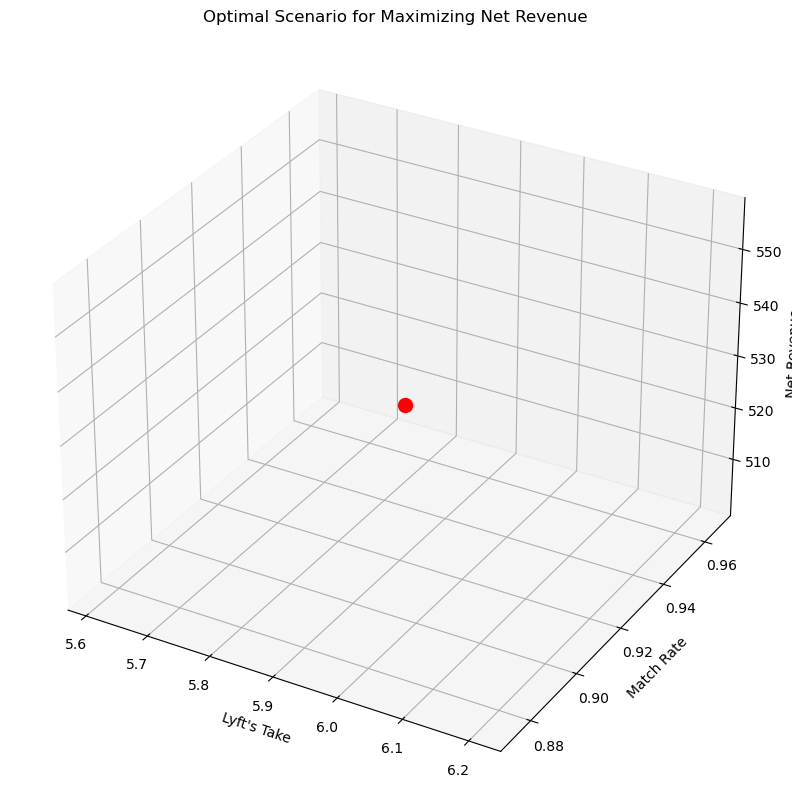

In [17]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot for the optimal scenario
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(optimal_scenario['LyftTake'], optimal_scenario['MatchRate'], optimal_net_revenue, s=100, c='red', marker='o')
ax.set_xlabel("Lyft's Take")
ax.set_ylabel("Match Rate")
ax.set_zlabel("Net Revenue")
ax.set_title("Optimal Scenario for Maximizing Net Revenue")
plt.show()


## Based on the predictions from the Machine Learning model, the optimal scenario for maximizing net revenue on the Toledo route is as follows:

#### - Optimal Lyft's Take: Approximately $5.91 per ride
#### - Match Rate: About 92%

#### - Driver Churn Rate: Approximately 6.88%

#### - Rider Churn Rate: Around 32.3%

#### - Predicted Net Revenue (per Month for 100 Rides): $529.21

#### This scenario suggests that slightly increasing Lyft's take to about $5.91, while maintaining a high match rate of around 92%, could maximize net revenue. It's important to note that this is based on simulated data, and real-world results may vary. In practice, these predictions should be tested in a controlled environment, and adjustments should be made based on actual performance data.

By using this ML approach, we can dynamically adjust our strategy based on changing market conditions and continuously optimize for net revenue. This solution allows for a more nuanced and data-driven decision-making process. ​